In [1]:
from __future__ import print_function

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne
import copy

from mne.time_frequency import tfr_morlet, tfr_multitaper

import ecogtools

%matplotlib inline

In [2]:
patient_num = "2002"

channels = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

data = ecogtools.ToM_Localizer(patient_num)

# Get the times for task from behavioral data
tmin = int(data.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data.phys.load_data()
data.phys.pick_channels(channels)

# Create epochs object for trial viz and averaging.
data.initialize_epochs_object(channels, tmin=-6., tmax=6., baseline=None)

Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif...
This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


Isotrak not found
    Range : 0 ... 4157999 =      0.000 ...  2078.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-1.fif...
Isotrak not found
    Range : 4158000 ... 8315999 =   2079.000 ...  4157.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-2.fif...
Isotrak not found
    Range : 8316000 ... 12473999 =   4158.000 ...  6236.999 secs
Ready.
Opening raw data file /Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002-3.fif...
Isotrak not found
    Range : 12474000 ... 14399951 =   6237.000 ...  7199.975 secs
Ready.
Reading 0 ... 664000  =      0.000 ...   332.000 secs...
60 matching events found
0 projection items activated
Loading data for 60 events and 24001 original time points ...
0 bad epochs dropped


In [4]:
# Define frequencies, cycles and bandwidth
freqs = np.linspace(80, 150, 25)
n_cycles = freqs/2.0
time_bandwidth = 8.0

In [5]:
# Calculate power for Time of Response
belief_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['b/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False, n_jobs=2)
photo_tr_power = mne.time_frequency.tfr_multitaper(data.epochs['p/time_of_resp'], freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False, n_jobs=2)
TR_power = data.compute_diff_power(belief_tr_power, photo_tr_power)

[Parallel(n_jobs=2)]: Done  13 out of  12 | elapsed:   22.7s remaining:   -1.7s
[Parallel(n_jobs=2)]: Done  13 out of  12 | elapsed:   26.8s remaining:   -2.1s
[Parallel(n_jobs=2)]: Done  13 out of  12 | elapsed:   27.0s remaining:   -2.1s
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   27.0s finished
[Parallel(n_jobs=2)]: Done  13 out of  12 | elapsed:   22.2s remaining:   -1.7s
[Parallel(n_jobs=2)]: Done  13 out of  12 | elapsed:   26.6s remaining:   -2.0s
[Parallel(n_jobs=2)]: Done  13 out of  12 | elapsed:   26.6s remaining:   -2.0s
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   26.6s finished


In [6]:
# Times and baseline periods for QS/TR
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

## The plot numbers for the graphs below are based on their actual spatial orientation in the patient's grid. Check with the grid map and the numbers of channels of interest to match up where they should be (and how many subplots you need).

Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)
Applying baseline correction (mode: ratio)


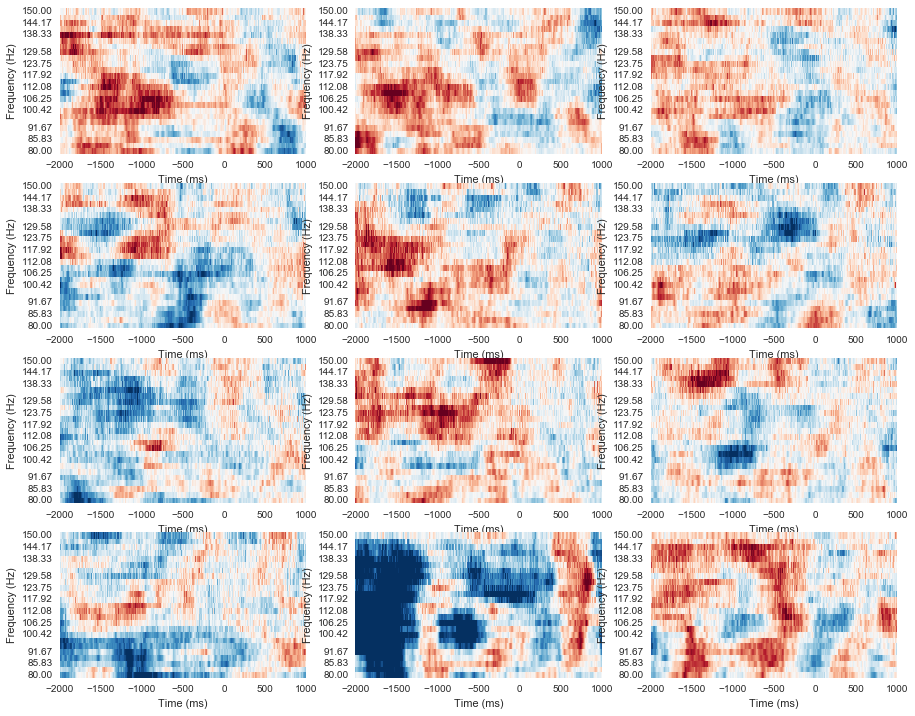

In [7]:
f, axes = plt.subplots(4, 3, figsize=(15,12));
TR_power.plot([0], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[3, 2], show=False, colorbar=False, **TR_times);
TR_power.plot([1], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[3, 1], show=False, colorbar=False, **TR_times);
TR_power.plot([2], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[3, 0], show=False, colorbar=False, **TR_times);
TR_power.plot([3], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[2, 2], show=False, colorbar=False, **TR_times);
TR_power.plot([4], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[2, 1], show=False, colorbar=False, **TR_times);
TR_power.plot([5], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[2, 0], show=False, colorbar=False, **TR_times);
TR_power.plot([6], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[1, 2], show=False, colorbar=False, **TR_times);
TR_power.plot([7], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[1, 1], show=False, colorbar=False, **TR_times);
TR_power.plot([8], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[1, 0], show=False, colorbar=False, **TR_times);
TR_power.plot([9], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[0, 2], show=False, colorbar=False, **TR_times);
TR_power.plot([10], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[0, 1], show=False, colorbar=False, **TR_times);
TR_power.plot([11], baseline=TR_baseline, mode='ratio', dB=True, vmin=-5., vmax=5., axes=axes[0, 0], show=False, colorbar=False, **TR_times);
f.savefig("patient_"+patient_num+"/ToM_Loc_plots/"+"TR_all_channels_2secs.png")